<a href="https://colab.research.google.com/github/madhavimali/Zomoto_Restaurant_Clustering_and_Sentiment_Analysis_MM/blob/main/MM_Zomoto_Restaurant_Clustering_and_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

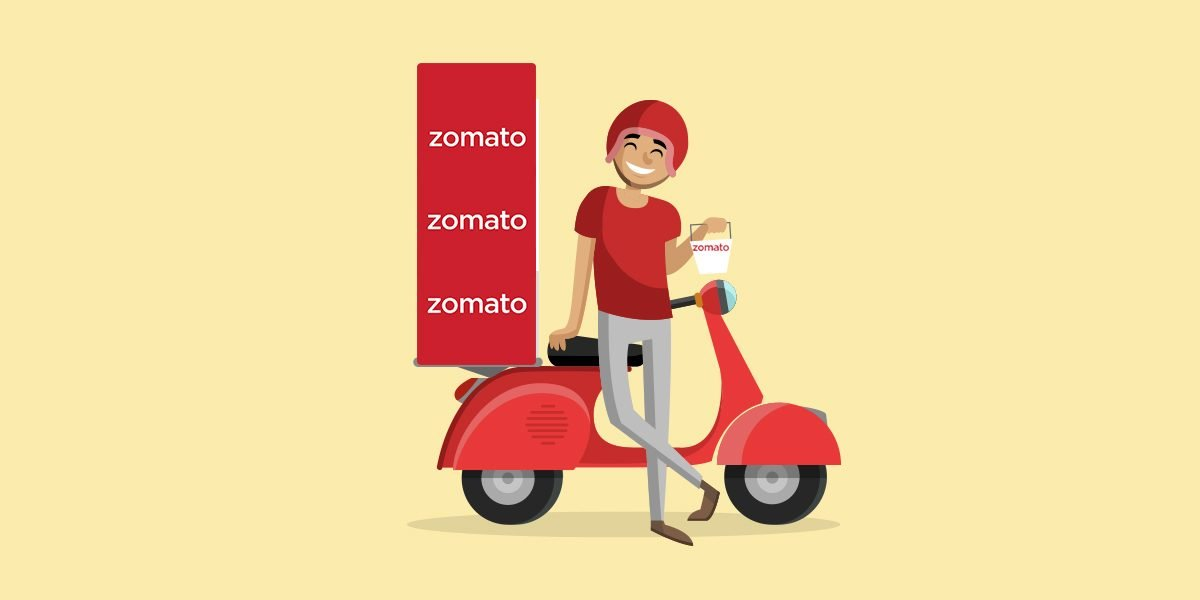

#**Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.

#**Attribute Information**


##**Zomato Restaurant names and Metadata**
Use this dataset for clustering part

Name : Name of Restaurants

Links : URL Links of Restaurants

Cost : Per person estimated Cost of dining

Collection : Tagging of Restaurants w.r.t. Zomato categories

Cuisines : Cuisines served by Restaurants

Timings : Restaurant Timings


##**Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

Restaurant : Name of the Restaurant

Reviewer : Name of the Reviewer

Review : Review Text

Rating : Rating Provided by Reviewer

MetaData : Reviewer Metadata - No. of Reviews and followers

Time: Date and Time of Review

Pictures : No. of pictures posted with review



#**Importing Libraries and Data**

In [1]:
# Import libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as po
from wordcloud import WordCloud

from collections import Counter
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

##**Mount Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing datasets
meta_df_main = pd.read_csv('/content/drive/MyDrive/Almabetter Access the data/Copy of Zomato Restaurant names and Metadata.csv')
review_df = pd.read_csv('/content/drive/MyDrive/Almabetter Access the data/Copy of Zomato Restaurant reviews.csv')

In [4]:
zom_df = meta_df_main.copy()

#**First Look**

In [5]:
zom_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [6]:
zom_df.tail()

,Name,Links,Cost,Collections,Cuisines,Timings
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,NaN,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun)
104,Republic Of Noodles - Lemon Tree Hotel,https://www.zomato.com/hyderabad/republic-of-n...,"1,700",Pan-Asian Delicacies,"Thai, Asian, Chinese, Malaysian","11:30 AM to 3 PM, 7 PM to 12 Midnight"


In [7]:
#Checking the Data
zom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [8]:
zom_df.describe()

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [9]:
zom_df.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [10]:
#Checking the Null values in "Collection feature"
zom_df[zom_df['Collections'].isnull()].head()

,Name,Links,Cost,Collections,Cuisines,Timings
7,Shah Ghouse Spl Shawarma,https://www.zomato.com/hyderabad/shah-ghouse-s...,300,NaN,Lebanese,12 Noon to 12 Midnight
15,KFC,https://www.zomato.com/hyderabad/kfc-gachibowli,500,NaN,"Burger, Fast Food",11 AM to 11 PM
16,NorFest - The Dhaba,https://www.zomato.com/hyderabad/norfest-the-d...,550,NaN,North Indian,12 Noon to 10:30 PM
17,Hotel Zara Hi-Fi,https://www.zomato.com/hyderabad/hotel-zara-ga...,400,NaN,"Chinese, North Indian",11:30 AM to 1 AM
23,Amul,https://www.zomato.com/hyderabad/amul-gachibowli,150,NaN,"Ice Cream, Desserts",10 AM to 5 AM


In [11]:
zom_df[zom_df['Timings'].isnull()]

,Name,Links,Cost,Collections,Cuisines,Timings
30,Pot Pourri,https://www.zomato.com/hyderabad/pot-pourri-ga...,900,NaN,"Andhra, South Indian, North Indian",NaN


In [12]:
zom_df.describe()

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [13]:
#Checking duplicate rows in the dataset
zom_df.duplicated(keep = 'last').sum()

0

In [14]:
#Checking duplicate restaurant names
zom_df['Name'].duplicated().sum()

0

In [15]:
#Checking cost function's data type
zom_df['Cost'] = zom_df['Cost'].str.replace(",", "").astype('int64')

In [16]:
type('Cost')

str

#**EDA on Meta Data Dataset**

In [17]:
zom_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [18]:
#Checking the shape of the dataset
zom_df.shape

(105, 6)

In [19]:
zom_df['Name'].nunique()

105

***Points to be noted:*** 

* There are 105 rows and 6 columns provided in the data.
* Null values are present in collections and timings.
* No duplicate values exist.


In [20]:
#Top 10 costly restaurants
top_10_costly_rest = zom_df[['Name', 'Cost']].groupby('Name', as_index=False).sum().sort_values(by='Cost', ascending=False).head(10)

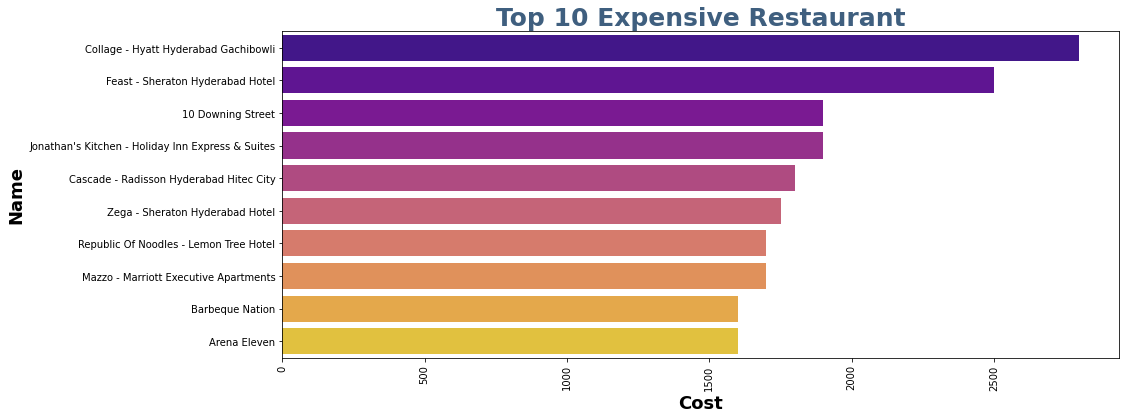

In [21]:
# Top 10 Expensive Restaurants vs their cost
plt.figure(figsize=(15,6))
x = top_10_costly_rest['Cost']
y = top_10_costly_rest['Name']
plt.title("Top 10 Expensive Restaurant",fontsize=25,weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Name",weight='bold',fontsize=18)
plt.xlabel("Cost",weight='bold',fontsize=18)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='plasma')
plt.show()

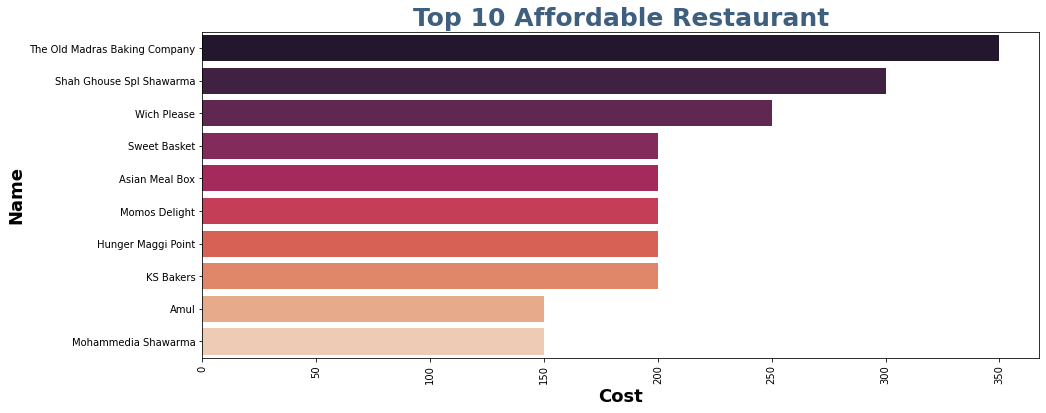

In [22]:
# Affordable price restaurants vs their cost
plt.figure(figsize=(15,6))
top_10_affor_rest=zom_df[['Name','Cost']].groupby('Name',as_index=False).sum().sort_values(by='Cost',ascending=False).tail(10)
x = top_10_affor_rest['Cost']
y = top_10_affor_rest['Name']
plt.title("Top 10 Affordable Restaurant",fontsize=25, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Name",weight='bold',fontsize=18)
plt.xlabel("Cost",weight='bold',fontsize=18)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='rocket')
plt.show()

(-0.5, 1399.5, 1399.5, -0.5)

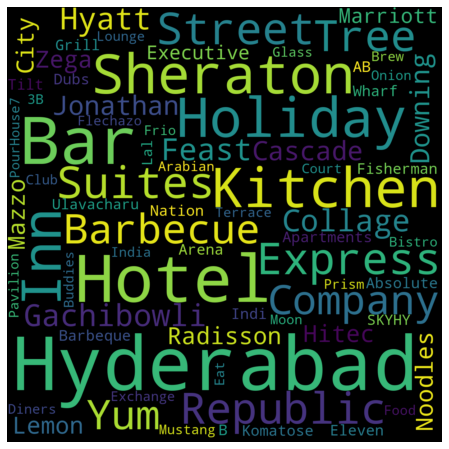

In [23]:
#Creating word cloud for expensive restaurants
plt.figure(figsize=(15,8))
text = " ".join(name for name in zom_df.sort_values('Cost',ascending=False).Name[:30])


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'black').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

In [24]:
#using nltk to use stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [25]:
# extracting the stopwords from nltk library
sw = stopwords.words('english')

In [26]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [27]:
# Removing stopwords from Cuisines
zom_df['Cuisines'] = zom_df['Cuisines'].apply(lambda text: stopwords(text))
zom_df['Cuisines'].head()

0    chinese, continental, kebab, european, south i...
1                       biryani, north indian, chinese
2         asian, mediterranean, north indian, desserts
3    biryani, north indian, chinese, seafood, bever...
4    asian, continental, north indian, chinese, med...
Name: Cuisines, dtype: object

In [28]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [29]:
zom_df['Cuisines'] = zom_df['Cuisines'].apply(lambda x: remove_punctuation(x))
zom_df['Cuisines'].head()

0    chinese continental kebab european south india...
1                         biryani north indian chinese
2            asian mediterranean north indian desserts
3       biryani north indian chinese seafood beverages
4    asian continental north indian chinese mediter...
Name: Cuisines, dtype: object

In [30]:
import re

In [31]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)

In [32]:
zom_df['Cuisines'] = zom_df['Cuisines'].apply(lambda x: cleaning_repeating_char(x))
zom_df['Cuisines'].head()

0    chinese continental kebab european south india...
1                         biryani north indian chinese
2            asian mediterranean north indian desserts
3       biryani north indian chinese seafood beverages
4    asian continental north indian chinese mediter...
Name: Cuisines, dtype: object

In [33]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

In [34]:
zom_df['Cuisines'] = zom_df['Cuisines'].apply(lambda x: cleaning_numbers(x))
zom_df['Cuisines'].head()

0    chinese continental kebab european south india...
1                         biryani north indian chinese
2            asian mediterranean north indian desserts
3       biryani north indian chinese seafood beverages
4    asian continental north indian chinese mediter...
Name: Cuisines, dtype: object

In [35]:
from collections import Counter 
text = ' '.join(zom_df['Cuisines'])
words = text.split()

two_words = {' '.join(words):n for words,n in Counter(zip(words, words[1:])).items() if not  words[0][-1]==(',')}

In [36]:
word_freq = pd.DataFrame(two_words.items(), columns=['Cuisine_Words', 'Frequency'])
word_freq = word_freq.sort_values(by = "Frequency", ascending = False)
word_freq_20 = word_freq[:20]

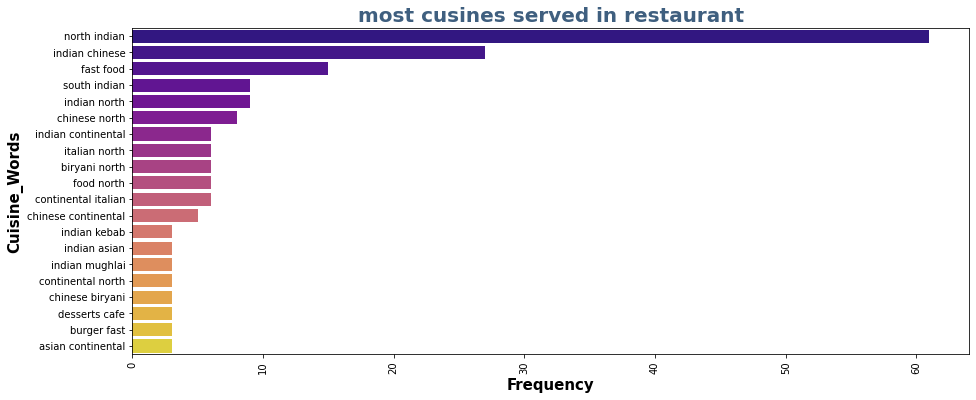

In [37]:
# most cusines served in restaurant
plt.figure(figsize=(15,6))
y = word_freq_20['Cuisine_Words']
x = word_freq_20['Frequency']
plt.title("most cusines served in restaurant",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Cuisine Words",weight='bold',fontsize=15)
plt.xlabel("Frequency",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette="plasma")
plt.show()

(-0.5, 1399.5, 1399.5, -0.5)

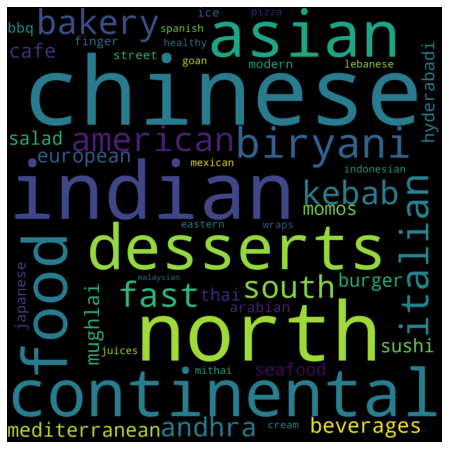

In [38]:
#Wordcloud for Cuisine
plt.figure(figsize=(15,8))
text = " ".join(name for name in word_freq.Cuisine_Words )


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'black').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

#**'Review' DataSheet**

####**Data Cleaning**

In [39]:
review_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [40]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [41]:
review_df.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

In [42]:
review_df.loc[review_df['Rating'] == 'Like'] = np.nan
review_df['Rating']= review_df['Rating'].astype('float64')

In [43]:
print(review_df['Rating'].mean())

3.601044071880333


In [44]:
review_df['Rating'].fillna(3.6, inplace=True)


In [45]:
# split metadata column into 2 columns i.e. Reviews and followers
review_df['Reviews'],review_df['Followers']= review_df['Metadata'].str.split(',').str
review_df['Reviews'] = pd.to_numeric(review_df['Reviews'].str.split(' ').str[0])

In [46]:
review_df['Followers']= pd.to_numeric(review_df['Followers'].str.split(' ').str[1])

In [47]:
review_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Reviews,Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0.0,1.0,2.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0.0,3.0,2.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0.0,2.0,3.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0.0,1.0,1.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0.0,3.0,2.0


In [48]:
# Converting Time column into Time, Year, Month, Hour
review_df['Time']=pd.to_datetime(review_df['Time'])
review_df['Year'] = pd.DatetimeIndex(review_df['Time']).year
review_df['Month'] = pd.DatetimeIndex(review_df['Time']).month
review_df['Hour'] = pd.DatetimeIndex(review_df['Time']).hour
review_df = review_df.drop(['Metadata'], axis =1)

In [49]:
review_df.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0.0,1.0,2.0,2019.0,5.0,15.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0.0,3.0,2.0,2019.0,5.0,14.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0.0,2.0,3.0,2019.0,5.0,22.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0.0,1.0,1.0,2019.0,5.0,22.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0.0,3.0,2.0,2019.0,5.0,21.0


In [50]:
review_df.isnull().sum()

Restaurant       1
Reviewer        39
Review          46
Rating           0
Time            39
Pictures         1
Reviews         39
Followers     1617
Year            39
Month           39
Hour            39
dtype: int64

***Points to be noted:*** 

* There are 9954 rows and 15 columns provided in the data.
* Null values are present in Restaurant , Reviewer , Review , Time,Pictures,Reviews , Followers , Year , month and Hour.
* No duplicate values exist.
*Now we will remove all the Null values and clean the data




In [51]:
# Replacing followers and reviews null values into 0
review_df['Followers'].fillna(0,inplace=True)
review_df['Reviews'].fillna(0,inplace=True)

In [52]:
# we can drop the remaining missing data
review_df.dropna(inplace=True)

In [53]:
review_df.reset_index(inplace = True)

In [54]:
review_df.isnull().sum()

index         0
Restaurant    0
Reviewer      0
Review        0
Rating        0
Time          0
Pictures      0
Reviews       0
Followers     0
Year          0
Month         0
Hour          0
dtype: int64

In [55]:
review_df.head()

,index,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
0,0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0.0,1.0,2.0,2019.0,5.0,15.0
1,1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0.0,3.0,2.0,2019.0,5.0,14.0
2,2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0.0,2.0,3.0,2019.0,5.0,22.0
3,3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0.0,1.0,1.0,2019.0,5.0,22.0
4,4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0.0,3.0,2.0,2019.0,5.0,21.0


In [56]:
review_df.describe()

,index,Rating,Pictures,Reviews,Followers,Year,Month,Hour
count,9954.000000,9954.000000,9954.000000,9954.000000,9954.000000,9954.000000,9954.000000,9954.000000
mean,4983.199920,3.600261,0.751959,24.007937,163.122363,2018.452381,6.017079,15.183946
std,2882.485546,1.483573,2.575819,50.631674,620.182806,0.562566,3.160515,6.580345
min,0.000000,1.000000,0.000000,0.000000,0.000000,2016.000000,1.000000,0.000000
25%,2489.250000,3.000000,0.000000,1.000000,1.000000,2018.000000,4.000000,12.000000
50%,4977.500000,4.000000,0.000000,4.000000,7.000000,2018.000000,5.000000,16.000000
75%,7468.750000,5.000000,0.000000,22.000000,63.000000,2019.000000,8.000000,21.000000
max,9999.000000,5.000000,64.000000,1031.000000,13410.000000,2019.000000,12.000000,23.000000


##EDA on reviews dataset

Text(0.5, 0, 'Ratings')

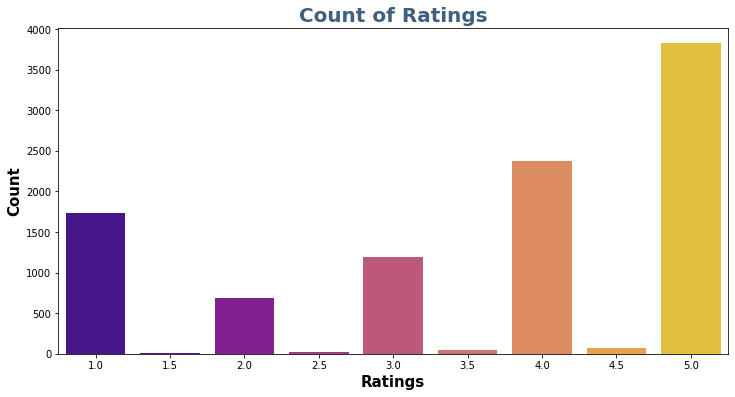

In [57]:
# Countplot of Ratings
plt.figure(figsize=(12,6))
sns.countplot(review_df['Rating'],palette="plasma")
plt.title("Count of Ratings",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Count",weight='bold',fontsize=15)
plt.xlabel("Ratings",weight='bold',fontsize=15)

Text(0.5, 0, 'Time')

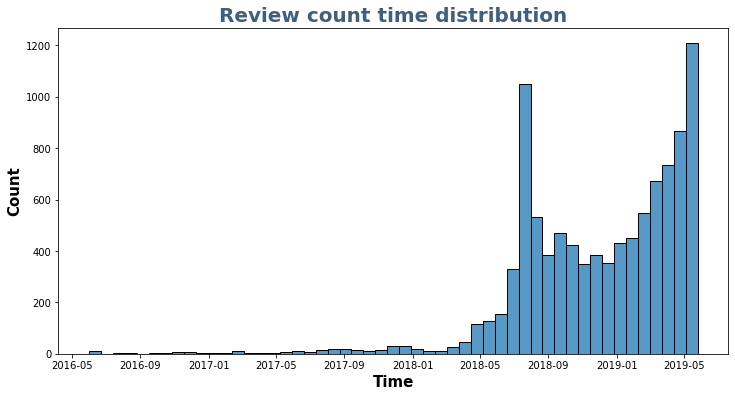

In [58]:
plt.figure(figsize=(12,6))
sns.histplot(review_df.Time, palette="plasma")
plt.title("Review count time distribution",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Count",weight='bold',fontsize=15)
plt.xlabel("Time",weight='bold',fontsize=15)

Text(0.5, 1.0, 'Month wise distribtion')

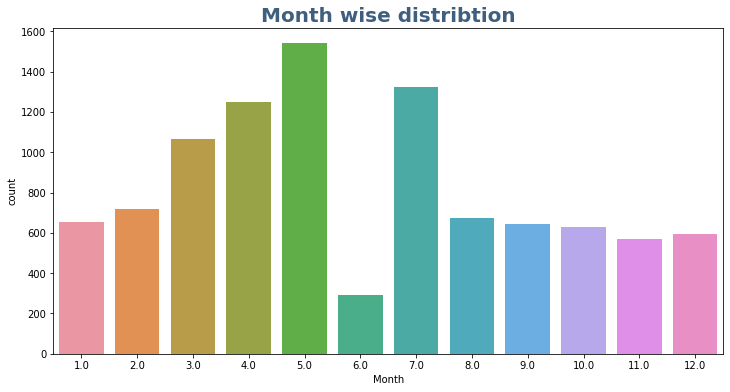

In [59]:
plt.figure(figsize=(12,6))
sns.countplot(review_df.Month)
plt.title("Month wise distribtion",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])


In [60]:
#Top Reviewers
reviewer_list = review_df.groupby('Reviewer').apply(lambda x: x['Reviewer'].count()).reset_index(name='Review_Count')
reviewer_list = reviewer_list.sort_values(by = 'Review_Count',ascending=False)
top_reviewers = reviewer_list[:15]
top_reviewers.head()

,Reviewer,Review_Count
654,Ankita,13
3855,Parijat Ray,13
2652,Kiran,12
7009,Vedant Killa,11
2311,Jay Mehta,11


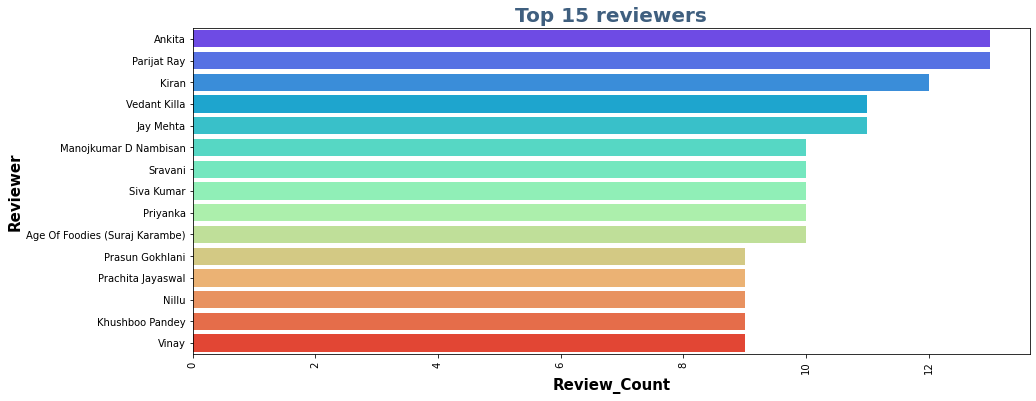

In [61]:
# Top reviewers vs their Review count
plt.figure(figsize=(15,6))
x = top_reviewers['Review_Count']
y = top_reviewers['Reviewer']
plt.title("Top 15 reviewers",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Name",weight='bold',fontsize=15)
plt.xlabel("No. of Reviews",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='rainbow')
plt.show()

In [62]:
# Average of the ratings of reviewers with review count
review_ratings=review_df.groupby('Reviewer').apply(lambda x:np.average(x['Rating'])).reset_index(name='AverageRatings')
review_ratings=pd.merge(top_reviewers,review_ratings,how='inner',left_on='Reviewer',right_on='Reviewer')
top_reviewers_ratings=review_ratings[:15]
top_reviewers_ratings=top_reviewers_ratings.sort_values(by = 'AverageRatings',ascending=False)
top_reviewers_ratings.head()

,Reviewer,Review_Count,AverageRatings
2,Kiran,12,4.500000
11,Prachita Jayaswal,9,4.333333
3,Vedant Killa,11,4.000000
6,Sravani,10,4.000000
10,Prasun Gokhlani,9,4.000000


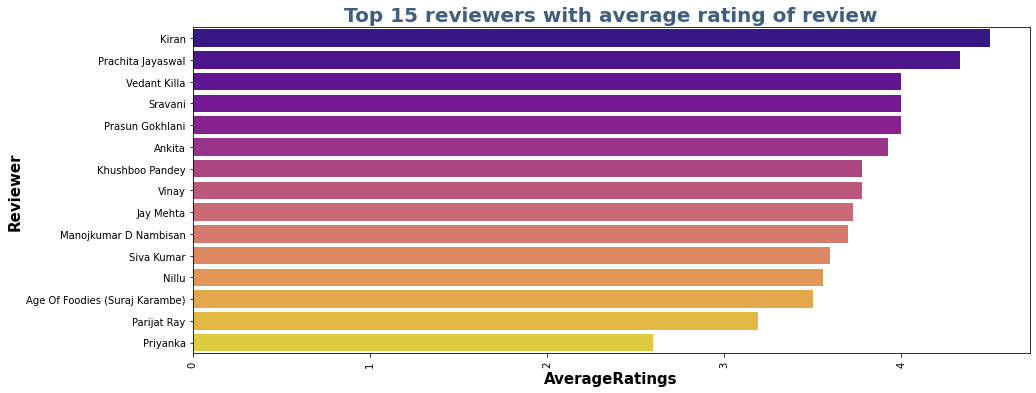

In [63]:
# Average rating of top reviewers
plt.figure(figsize=(15,6))
x = top_reviewers_ratings['AverageRatings']
y = top_reviewers_ratings['Reviewer']
plt.title("Top 15 reviewers with average rating of review",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Name",weight='bold',fontsize=15)
plt.xlabel("Average Rating",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='plasma')
plt.show()

In [64]:
# Review per hour
reviews_hour = review_df.groupby('Hour').apply(lambda x: x['Hour'].count()).reset_index(name='Reviews_per_hour')

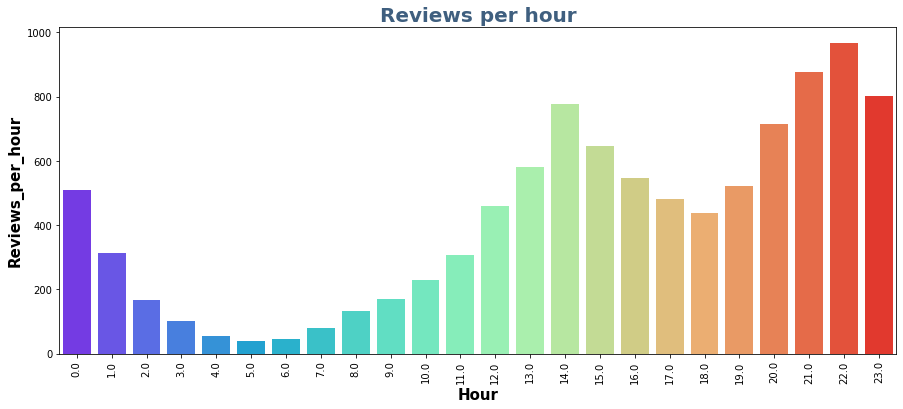

In [65]:
# plotting reviews per hour
plt.figure(figsize=(15,6))
x = reviews_hour['Hour']
y = reviews_hour['Reviews_per_hour']
plt.title("Reviews per hour",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Reviews per hour",weight='bold',fontsize=15)
plt.xlabel("Hour",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='rainbow')
plt.show()

(-0.5, 1399.5, 1399.5, -0.5)

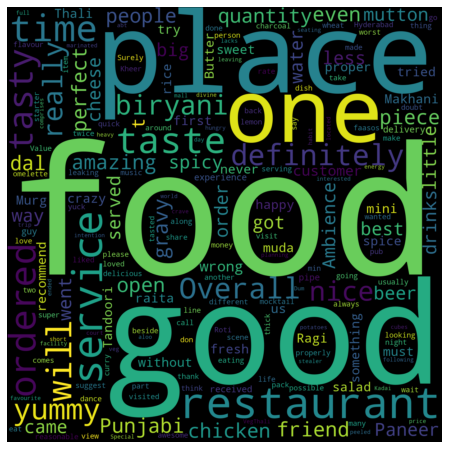

In [66]:
#Creating word cloud for reviews
plt.figure(figsize=(15,8))
text = " ".join(name for name in review_df.sort_values('Review',ascending=False).Review[:30])


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'black').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

##Text Cleaning

**(Removing punctuation, Removing stopwords, Lemmatization)**

In [67]:
review= review_df.Review
review

0       The ambience was good, food was quite good . h...
1       Ambience is too good for a pleasant evening. S...
2       A must try.. great food great ambience. Thnx f...
3       Soumen das and Arun was a great guy. Only beca...
4       Food is good.we ordered Kodi drumsticks and ba...
                              ...                        
9949    Madhumathi Mahajan Well to start with nice cou...
9950    This place has never disappointed us.. The foo...
9951    Bad rating is mainly because of "Chicken Bone ...
9952    I personally love and prefer Chinese Food. Had...
9953    Checked in here to try some delicious chinese ...
Name: Review, Length: 9954, dtype: object

In [68]:
review_df['Review'] = review_df['Review'].apply(remove_punctuation)

In [69]:
review_df['Review'] = review_df['Review'].apply(stopwords)

In [70]:
# Remove non letters
import re
regex = re.compile('[^a-zA-Z]')
def remove_non_leters(text):
  '''used to remove all non leters form the list 
  '''
  text=[regex.sub(' ', x) for x in text]
  return text

In [71]:
review=remove_non_leters(review)

In [72]:
# storing the reviews in a feature of df
review_df['Review']=review
review_df.head()

,index,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
0,0,Beyond Flavours,Rusha Chakraborty,ambience good food quite good saturday lunch c...,5.0,2019-05-25 15:54:00,0.0,1.0,2.0,2019.0,5.0,15.0
1,1,Beyond Flavours,Anusha Tirumalaneedi,ambience good pleasant evening service prompt ...,5.0,2019-05-25 14:20:00,0.0,3.0,2.0,2019.0,5.0,14.0
2,2,Beyond Flavours,Ashok Shekhawat,must try great food great ambience thnx servic...,5.0,2019-05-24 22:54:00,0.0,2.0,3.0,2019.0,5.0,22.0
3,3,Beyond Flavours,Swapnil Sarkar,soumen das arun great guy behavior sincerety g...,5.0,2019-05-24 22:11:00,0.0,1.0,1.0,2019.0,5.0,22.0
4,4,Beyond Flavours,Dileep,food goodwe ordered kodi drumsticks basket mut...,5.0,2019-05-24 21:37:00,0.0,3.0,2.0,2019.0,5.0,21.0


In [73]:
#function to removing words greater than 45 and less than 2
def len_less_than2(review):
  review=" ".join([i for i in review.split() if len(i)>2])
  review=" ".join([i for i in review.split() if len(i)<=45])
  return review

In [74]:
#removing words greater than 45 and less than 2
review_df['Review']=review_df['Review'].apply(lambda x:len_less_than2(x))

In [75]:
review_df.head()

,index,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
0,0,Beyond Flavours,Rusha Chakraborty,ambience good food quite good saturday lunch c...,5.0,2019-05-25 15:54:00,0.0,1.0,2.0,2019.0,5.0,15.0
1,1,Beyond Flavours,Anusha Tirumalaneedi,ambience good pleasant evening service prompt ...,5.0,2019-05-25 14:20:00,0.0,3.0,2.0,2019.0,5.0,14.0
2,2,Beyond Flavours,Ashok Shekhawat,must try great food great ambience thnx servic...,5.0,2019-05-24 22:54:00,0.0,2.0,3.0,2019.0,5.0,22.0
3,3,Beyond Flavours,Swapnil Sarkar,soumen das arun great guy behavior sincerety g...,5.0,2019-05-24 22:11:00,0.0,1.0,1.0,2019.0,5.0,22.0
4,4,Beyond Flavours,Dileep,food goodwe ordered kodi drumsticks basket mut...,5.0,2019-05-24 21:37:00,0.0,3.0,2.0,2019.0,5.0,21.0


# Sentiment Analysis

**Sentiment Analysis of review**

In [76]:
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import plotly.express as px


In [77]:
#Create a function to get the subjectivity
def subjectivity(text): 
    return TextBlob(text).sentiment.subjectivity

In [78]:
#Create a function to get the polarity
def polarity(text): 
    return TextBlob(text).sentiment.polarity

In [79]:
#Create two new columns
review_df['Subjectivity'] = review_df['Review'].apply(subjectivity)
review_df['Polarity'] = review_df['Review'].apply(polarity)

In [80]:
#Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score <0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [81]:
review_df['Analysis'] = review_df['Polarity'].apply(getAnalysis)

In [82]:
# plot the polarity and subjectivity
fig = px.scatter(review_df, 
                 x='Polarity', 
                 y='Subjectivity', 
                 color = 'Analysis',
                 size='Subjectivity')

In [83]:
#add a vertical line at x=0 for Netural Reviews

fig.update_layout(title='Sentiment Analysis' ,
                  shapes=[dict(type= 'line',
                               yref= 'paper', y0= 0, y1= 1, 
                               xref= 'x', x0= 0, x1= 0)])
fig.show()

The x-axis shows polarity, and y-axis shows subjectivity. Polarity tells how positive or negative the text is. The subjectivity tells how subjective or opinionated the text is

In [84]:
review_df.head()

,index,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour,Subjectivity,Polarity,Analysis
0,0,Beyond Flavours,Rusha Chakraborty,ambience good food quite good saturday lunch c...,5.0,2019-05-25 15:54:00,0.0,1.0,2.0,2019.0,5.0,15.0,0.720000,0.660000,Positive
1,1,Beyond Flavours,Anusha Tirumalaneedi,ambience good pleasant evening service prompt ...,5.0,2019-05-25 14:20:00,0.0,3.0,2.0,2019.0,5.0,14.0,0.691667,0.708333,Positive
2,2,Beyond Flavours,Ashok Shekhawat,must try great food great ambience thnx servic...,5.0,2019-05-24 22:54:00,0.0,2.0,3.0,2019.0,5.0,22.0,0.675000,0.550000,Positive
3,3,Beyond Flavours,Swapnil Sarkar,soumen das arun great guy behavior sincerety g...,5.0,2019-05-24 22:11:00,0.0,1.0,1.0,2019.0,5.0,22.0,0.675000,0.750000,Positive
4,4,Beyond Flavours,Dileep,food goodwe ordered kodi drumsticks basket mut...,5.0,2019-05-24 21:37:00,0.0,3.0,2.0,2019.0,5.0,21.0,0.525000,0.525000,Positive


In [85]:
# Converting Analysis into numeric form Postive=0 and Negative =1
def sentiment(analysis):
  if analysis == 'Positive':
    return 0
  elif analysis == 'Neutral' :
    return 0
    # positive sentiment
  else:
    return 1
    # neagative sentiment 

In [86]:
review_df['Analysis']=review_df['Analysis'].apply(lambda x:sentiment(x))

In [87]:
sentiment_df= review_df[['Review','Rating','Analysis']]
sentiment_df.head()

,Review,Rating,Analysis
0,ambience good food quite good saturday lunch c...,5.0,0
1,ambience good pleasant evening service prompt ...,5.0,0
2,must try great food great ambience thnx servic...,5.0,0
3,soumen das arun great guy behavior sincerety g...,5.0,0
4,food goodwe ordered kodi drumsticks basket mut...,5.0,0


In [88]:
X = sentiment_df['Review']
y = sentiment_df['Analysis']

In [89]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,stratify=sentiment_df['Analysis'])

In [90]:

# creating tokens for text data
from sklearn.feature_extraction.text import  TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train= vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

# MultinomialNB

In [91]:
#Importing few libraries
from sklearn.metrics import accuracy_score, confusion_matrix,roc_auc_score, classification_report, f1_score

In [92]:
from sklearn.naive_bayes import MultinomialNB
# creating MultinomialNB model
model = MultinomialNB()

In [96]:
#training the model
model.fit(X_train,y_train)

MultinomialNB()

In [97]:
#predicting the values of y from x via model
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [98]:
def model_details(y_train, y_test, y_pred_train, y_pred_test):
  # Accuracy
  print('-'*50)
  train_accuracy = accuracy_score(y_train,y_pred_train)
  print('Train accuracy is:',train_accuracy)
  test_accuracy = accuracy_score(y_test,y_pred_test)
  print('Test accuracy is:',test_accuracy)
  print('-'*50)
  confusion_mat = confusion_matrix(y_pred_test, y_test)
  print("The confusion matrix on the test data is :")
  print(confusion_mat)
  print('-'*50)
  classification_rep= classification_report(y_pred_test, y_test)
  
  print("The classification report on the train data is :")
  print(classification_rep)


In [99]:
model_details(y_train, y_test, y_pred_train, y_pred_test)

--------------------------------------------------
Train accuracy is: 0.8420629604822505
Test accuracy is: 0.8240257131378064
--------------------------------------------------
The confusion matrix on the test data is :
[[2024  438]
 [   0   27]]
--------------------------------------------------
The classification report on the train data is :
              precision    recall  f1-score   support

           0       1.00      0.82      0.90      2462
           1       0.06      1.00      0.11        27

    accuracy                           0.82      2489
   macro avg       0.53      0.91      0.51      2489
weighted avg       0.99      0.82      0.89      2489



# Random Forest Classifier

In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [101]:
rf= RandomForestClassifier()

In [102]:
grid_values_rf = {'n_estimators': [100,150],'max_depth': [10,15],'criterion': ['entropy']}
rfc = GridSearchCV(estimator=rf,param_grid = grid_values_rf, scoring='recall',cv=5,verbose=5,n_jobs=-1)

In [103]:
rfc.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [10, 15],
                         'n_estimators': [100, 150]},
             scoring='recall', verbose=5)

In [104]:
random_y_pred_train=rfc.predict(X_train)
random_y_pred_test=rfc.predict(X_test)

In [105]:
model_details(y_train, y_test, random_y_pred_train, random_y_pred_test)

--------------------------------------------------
Train accuracy is: 0.8163429336905559
Test accuracy is: 0.8143832864604259
--------------------------------------------------
The confusion matrix on the test data is :
[[2024  462]
 [   0    3]]
--------------------------------------------------
The classification report on the train data is :
              precision    recall  f1-score   support

           0       1.00      0.81      0.90      2486
           1       0.01      1.00      0.01         3

    accuracy                           0.81      2489
   macro avg       0.50      0.91      0.46      2489
weighted avg       1.00      0.81      0.90      2489



# XGB Classifier

In [106]:
from xgboost import XGBClassifier

In [107]:
xgbc=XGBClassifier()

In [108]:
# finding the best parameters for XGBRegressor by gridsearchcv
xgbc_param={'n_estimators': [100,125,150],'max_depth': [7,10,15],'criterion': ['entropy']}
xgbc_grid=GridSearchCV(estimator=xgbc,param_grid=xgbc_param,cv=3,scoring='recall',verbose=5,n_jobs=-1)

In [109]:
xgbc_grid.fit(X_train, y_train)            # required 4 min to run

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [7, 10, 15],
                         'n_estimators': [100, 125, 150]},
             scoring='recall', verbose=5)

In [110]:
xgb_y_pred_train=xgbc_grid.predict(X_train)
xgb_y_pred_test=xgbc_grid.predict(X_test)

In [111]:
model_details(y_train, y_test, xgb_y_pred_train, xgb_y_pred_test)

--------------------------------------------------
Train accuracy is: 0.9954454119223041
Test accuracy is: 0.9401366010445962
--------------------------------------------------
The confusion matrix on the test data is :
[[1974   99]
 [  50  366]]
--------------------------------------------------
The classification report on the train data is :
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      2073
           1       0.79      0.88      0.83       416

    accuracy                           0.94      2489
   macro avg       0.88      0.92      0.90      2489
weighted avg       0.94      0.94      0.94      2489



## **Support Vector Machine**

In [112]:
from sklearn import svm
svm_clf = svm.SVC(probability=True)

In [113]:
svm_clf.fit(X_train, y_train)

SVC(probability=True)

In [114]:
svm_y_train_pred = svm_clf.predict(X_train)  
svm_y_test_pred = svm_clf.predict(X_test)  

In [115]:
model_details(y_train, y_test, svm_y_train_pred, svm_y_test_pred)


--------------------------------------------------
Train accuracy is: 0.9973208305425318
Test accuracy is: 0.9325030132583367
--------------------------------------------------
The confusion matrix on the test data is :
[[2005  149]
 [  19  316]]
--------------------------------------------------
The classification report on the train data is :
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      2154
           1       0.68      0.94      0.79       335

    accuracy                           0.93      2489
   macro avg       0.84      0.94      0.87      2489
weighted avg       0.95      0.93      0.94      2489



In [116]:
Comparision_dict={'Model_Name':['MultinomialNB','Random Forest','XGB', 'Support Vector Machine'],
                  'Training_accuracy':[0.8371,0.8140,0.9880,0.9961],
                  'Test_accuracy':[0.8232,0.8107,0.9369,0.9188]} 

In [117]:
Comparisione_df=pd.DataFrame(Comparision_dict)
Comparisione_df

,Model_Name,Training_accuracy,Test_accuracy
0,MultinomialNB,0.8371,0.8232
1,Random Forest,0.8140,0.8107
2,XGB,0.9880,0.9369
3,Support Vector Machine,0.9961,0.9188


## **LDA of Review**

In [118]:
pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 13.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=87e63e9341246cfed501a50adc8d10176ffb59f93088ab8994af4233be9ce4a0
  Stored in directory: /root/.cache/pip/wheels/90/61/ec/9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=c8e42845c9cf5e8fcda714c04644f165141b85e42d766229263b39e0ab277d62
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built pyLDAvis sklearn


In [119]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working

/usr/local/lib/python3.8/dist-packages/past/builtins/misc.py:4: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working



In [120]:
docs_raw = review_df['Review'].tolist()

In [122]:
#Transform text to vector form using the vectorizer object 
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{10,}\b', # num chars > 3 to avoid some meaningless words
                                max_df = 0.9,                        # discard words that appear in > 90% of the reviews
                                min_df = 10) 

In [123]:
#Apply transformation
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())

In [124]:
dtm_tfidf = tfidf_vectorizer.fit_transform(docs_raw) 

In [125]:
print("The shape of the tfidf is {}, meaning that there are {} {} and {} tokens made through the filtering process.".\
              format(dtm_tfidf.shape,dtm_tfidf.shape[0], review_df['Review'], dtm_tfidf.shape[1]))

The shape of the tfidf is (9954, 171), meaning that there are 9954 0       ambience good food quite good saturday lunch c...
1       ambience good pleasant evening service prompt ...
2       must try great food great ambience thnx servic...
3       soumen das arun great guy behavior sincerety g...
4       food goodwe ordered kodi drumsticks basket mut...
                              ...                        
9949    madhumathi mahajan well start nice courteous s...
9950    place never disappointed food courteous staff ...
9951    bad rating mainly chicken bone found veg food ...
9952    personally love prefer chinese food couple tim...
9953    checked try delicious chinese food seen nonveg...
Name: Review, Length: 9954, dtype: object and 171 tokens made through the filtering process.


In [126]:
# Define Search Param
search_params = {'n_components': [5, 10, 15, 20, 25, 30], 
                  'learning_decay': [.5, .7, .9]}

In [127]:
# Init the Model
lda = LatentDirichletAllocation()

In [128]:
model = GridSearchCV(lda, param_grid=search_params)

In [129]:
model.fit(dtm_tfidf)

GridSearchCV(estimator=LatentDirichletAllocation(),
             param_grid={'learning_decay': [0.5, 0.7, 0.9],
                         'n_components': [5, 10, 15, 20, 25, 30]})

In [130]:
best_lda_model = model.best_estimator_

In [131]:
# Topic Modelling Visualization for the Negative Reviews
pyLDAvis.sklearn.prepare(best_lda_model, dtm_tfidf, tfidf_vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.373411  0.092054       1        1  23.173160
4      0.050220 -0.332661       2        1  22.247748
0      0.246472  0.269407       3        1  20.390342
3      0.115070 -0.107063       4        1  17.496991
1     -0.038351  0.078262       5        1  16.691759, topic_info=              Term        Freq       Total Category  logprob  loglift
140     restaurant  601.000000  601.000000  Default  30.0000  30.0000
76      experience  587.000000  587.000000  Default  29.0000  29.0000
71      especially  222.000000  222.000000  Default  28.0000  28.0000
54      definitely  258.000000  258.000000  Default  27.0000  27.0000
61    disappointed  200.000000  200.000000  Default  26.0000  26.0000
..             ...         ...         ...      ...      ...      ...
38      complained   14.864419   15.634433   Topic5  -4.2461   1.7397
84      hospitable   13.933175   14.700659   Topic5  -4.3108   1.7366
161  uncomfortable   13.203925   13.973037   Topic5  -4.3646   1.7336
120   particularly   13.185072   13.954768   Topic5  -4.3660   1.7335
146    scrumptious   13.738743   14.566071   Topic5  -4.3248   1.7318

[187 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
0         4  0.997539      absolutely
2         3  0.923431      accessible
3         3  0.892800     accommodate
5         4  0.973220     accompanied
6         3  0.894574     accordingly
...     ...       ...             ...
167       2  0.975622  unprofessional
168       5  0.977876      vegetables
169       2  0.996422      vegetarian
170       1  0.642022     vegetarians
170       2  0.337906     vegetarians

[168 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 1, 4, 2])

## **Clustering**

In [132]:
meta_df_main['Cuisines'] = meta_df_main['Cuisines'].apply(lambda x : x.lower())


In [133]:
cuisine_df=meta_df_main.loc[:,['Name','Cost','Cuisines']]

In [134]:
cuisine_df.head()

,Name,Cost,Cuisines
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i..."
1,Paradise,800,"biryani, north indian, chinese"
2,Flechazo,"1,300","asian, mediterranean, north indian, desserts"
3,Shah Ghouse Hotel & Restaurant,800,"biryani, north indian, chinese, seafood, bever..."
4,Over The Moon Brew Company,"1,200","asian, continental, north indian, chinese, med..."


In [135]:
cuisine_df['Cuisines'] = cuisine_df['Cuisines'].str.replace(' ','')

cuisine_df['Cuisines'] = cuisine_df['Cuisines'].str.split(',')

In [136]:
cuisine_df.head()

,Name,Cost,Cuisines
0,Beyond Flavours,800,"[chinese, continental, kebab, european, southi..."
1,Paradise,800,"[biryani, northindian, chinese]"
2,Flechazo,"1,300","[asian, mediterranean, northindian, desserts]"
3,Shah Ghouse Hotel & Restaurant,800,"[biryani, northindian, chinese, seafood, bever..."
4,Over The Moon Brew Company,"1,200","[asian, continental, northindian, chinese, med..."


In [137]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(sparse_output=True)

####Making one hot encoded labels for each type of cuisines and dropping the cuisine column

In [138]:
cuisine_df = cuisine_df.join(pd.DataFrame.sparse.from_spmatrix(mlb.fit_transform(cuisine_df.pop('Cuisines')),
                                                               index=cuisine_df.index, columns=mlb.classes_))

In [139]:
cuisine_df.head()

,Name,Cost,american,andhra,arabian,asian,bakery,bbq,beverages,biryani,...,northindian,pizza,salad,seafood,southindian,spanish,streetfood,sushi,thai,wraps
0,Beyond Flavours,800,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,Paradise,800,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,Flechazo,"1,300",0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,Shah Ghouse Hotel & Restaurant,800,0,0,0,0,0,0,1,1,...,1,0,0,1,0,0,0,0,0,0
4,Over The Moon Brew Company,"1,200",0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


#### Merging the two dataframes so that we can add the average ratings of the restaurants also

In [140]:
review_df['Rating'].unique()

array([5. , 4. , 1. , 3. , 2. , 3.5, 4.5, 2.5, 1.5])

In [141]:
# Remove nan rating in Rating column
review_df.dropna(subset=['Rating'],inplace=True)

There was on rating 'Like' so we can change it into 4, because 4 is not in Rating column

In [142]:
review_df['Rating'] = review_df['Rating'].replace('Like', '4')

In [143]:
# Change data type of rating column to float
review_df['Rating']= review_df['Rating'].astype('float')

In [144]:
review_df.dropna(subset =['Review'], inplace=True)

####Creating a new df to get the average ratings for each Restaurant

In [145]:
ratings_df  = review_df.groupby('Restaurant')['Rating'].mean().reset_index()

In [146]:
ratings_df .sort_values(by='Rating',ascending = False).head(15)


,Restaurant,Rating
3,AB's - Absolute Barbecues,4.880
11,B-Dubs,4.810
2,"3B's - Buddies, Bar & Barbecue",4.760
67,Paradise,4.700
35,Flechazo,4.660
87,The Indi Grill,4.600
97,Zega - Sheraton Hyderabad Hotel,4.450
64,Over The Moon Brew Company,4.340
16,Beyond Flavours,4.280
19,Cascade - Radisson Hyderabad Hitec City,4.260


In [147]:
df_cluster = cuisine_df.merge(ratings_df, left_on='Name',right_on='Restaurant')

In [148]:
df_cluster.head()

,Name,Cost,american,andhra,arabian,asian,bakery,bbq,beverages,biryani,...,salad,seafood,southindian,spanish,streetfood,sushi,thai,wraps,Restaurant,Rating
0,Beyond Flavours,800,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,Beyond Flavours,4.28
1,Paradise,800,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,Paradise,4.70
2,Flechazo,"1,300",0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,Flechazo,4.66
3,Shah Ghouse Hotel & Restaurant,800,0,0,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,Shah Ghouse Hotel & Restaurant,3.21
4,Over The Moon Brew Company,"1,200",0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,Over The Moon Brew Company,4.34


In [149]:
# Changing name and order of columns
df_cluster = df_cluster[['Name', 'Cost','Rating', 'american', 'andhra', 'arabian', 'asian', 'bbq',
       'bakery', 'beverages', 'biryani', 'burger', 'cafe', 'chinese',
       'continental', 'desserts', 'european', 'fastfood', 'fingerfood', 'goan',
       'healthyfood', 'hyderabadi', 'icecream', 'indonesian', 'italian',
       'japanese', 'juices', 'kebab', 'lebanese', 'malaysian', 'mediterranean',
       'mexican', 'mithai', 'modernindian', 'momos', 'mughlai', 'northeastern',
       'northindian', 'pizza', 'salad', 'seafood', 'southindian', 'spanish',
       'streetfood', 'sushi', 'thai', 'wraps']]

In [150]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 47 columns):
 #   Column         Non-Null Count  Dtype           
---  ------         --------------  -----           
 0   Name           100 non-null    object          
 1   Cost           100 non-null    object          
 2   Rating         100 non-null    float64         
 3   american       100 non-null    Sparse[int64, 0]
 4   andhra         100 non-null    Sparse[int64, 0]
 5   arabian        100 non-null    Sparse[int64, 0]
 6   asian          100 non-null    Sparse[int64, 0]
 7   bbq            100 non-null    Sparse[int64, 0]
 8   bakery         100 non-null    Sparse[int64, 0]
 9   beverages      100 non-null    Sparse[int64, 0]
 10  biryani        100 non-null    Sparse[int64, 0]
 11  burger         100 non-null    Sparse[int64, 0]
 12  cafe           100 non-null    Sparse[int64, 0]
 13  chinese        100 non-null    Sparse[int64, 0]
 14  continental    100 non-null    Sparse[int64

In [151]:
df_cluster['Cost']= df_cluster['Cost'].str.replace(',','')

In [152]:
df_cluster['Cost']= df_cluster['Cost'].astype('float')

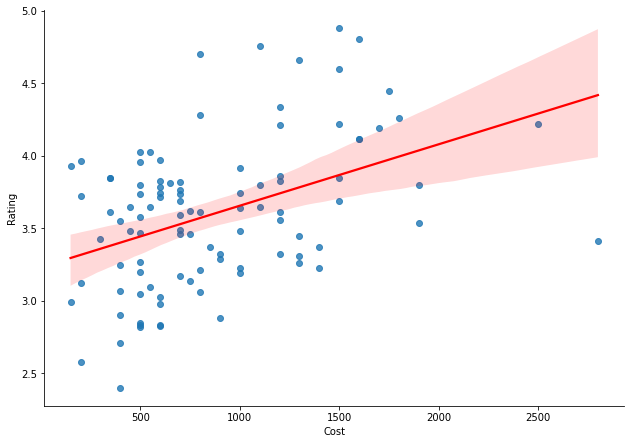

In [153]:
sns.lmplot(y='Rating',x='Cost',data=df_cluster,line_kws={'color' :'red'},height=6.27, aspect=11.7/8.27)

In [154]:
**We can already see some kind of a positive correlation bw cost and rating**

SyntaxError: ignored

# K-Means Clustering

In [155]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [156]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

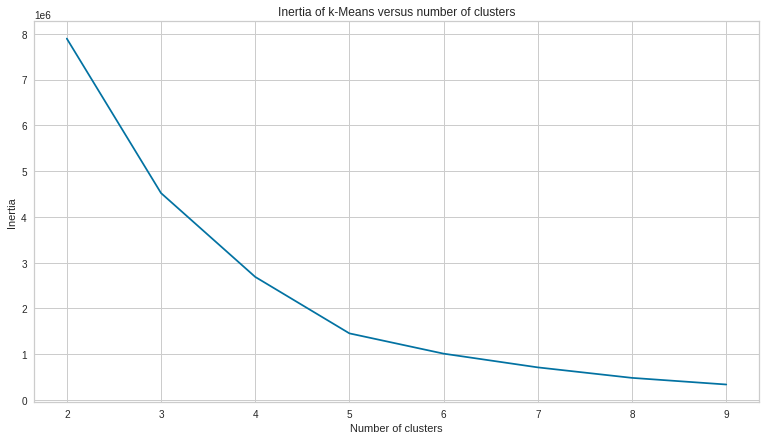

In [157]:
scores = [KMeans(n_clusters=i+2, random_state=11).fit(df_cluster.drop('Name',axis =1)).inertia_ 
          for i in range(8)]
plt.figure(figsize=(13,7))
sns.lineplot(np.arange(2, 10), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

From above it seems that 5 clustes are best.

In [158]:
model = KMeans(random_state=11, n_clusters=5)
model.fit(df_cluster.drop('Name',axis=1))

KMeans(n_clusters=5, random_state=11)

In [159]:
cluster_lbl = model.predict(df_cluster.drop('Name',axis=1))

In [160]:
#Adding a feature named "Label"
df_cluster['labels'] = cluster_lbl

Text(0.5, 0, 'Cost')

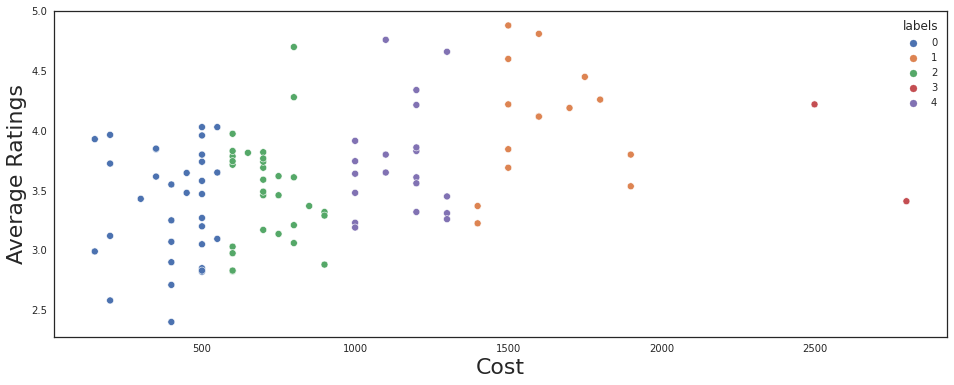

In [161]:
#Plotting avg rating vs cost using cluster
plt.figure(figsize = (16,6))
sns.set_style('white')
sns.scatterplot(y='Rating',x='Cost',data=df_cluster,hue='labels', palette = 'deep')
plt.ylabel('Average Ratings',fontdict={'size':22})
plt.xlabel('Cost',fontdict={'size':22})

As seen from above plot Restaurants have clustered well across the cost.

In [162]:
cluster_0 = df_cluster[df_cluster['labels'] == 0].reset_index()
cluster_1 = df_cluster[df_cluster['labels'] == 1].reset_index()
cluster_2 = df_cluster[df_cluster['labels'] == 2].reset_index()
cluster_3 = df_cluster[df_cluster['labels'] == 3].reset_index()
cluster_4 = df_cluster[df_cluster['labels'] == 4].reset_index()

In [163]:
list_of_cluster=[cluster_0,cluster_1,cluster_2,cluster_3,cluster_4]

In [164]:
# Top cuisines in each cluster
for i,df in enumerate(list_of_cluster):
  print(f'Top cuisines in cluster {i}\n', df.drop(['index','Name','Cost','Rating','labels'],axis=1).sum().sort_values(ascending=False)[:3],'\n')

Top cuisines in cluster 0
 northindian    16
chinese         9
fastfood        8
dtype: int64 

Top cuisines in cluster 1
 northindian    11
continental     6
asian           5
dtype: int64 

Top cuisines in cluster 2
 northindian    18
chinese        18
biryani        11
dtype: int64 

Top cuisines in cluster 3
 asian          2
italian        2
continental    2
dtype: int64 

Top cuisines in cluster 4
 northindian    14
chinese         9
italian         7
dtype: int64 



Here we can see that NorthIndian and Chinese are the prominent cuisines across all clusters.

# Principal Component Analysis(PCA)

In [165]:
#Scaling using MinMaxscaler
scaler = MinMaxScaler()
X = scaler.fit_transform(df_cluster.drop('Name',axis =1))

In [166]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)

In [167]:
X_pca = pca.fit_transform(X)

In [168]:
pca.components_

array([[-9.62465184e-02,  9.57677203e-03,  5.92680890e-02,
        -8.10689184e-02,  3.22812540e-03, -2.36603488e-02,
         1.13211710e-02,  1.00058721e-01,  6.13264813e-02,
        -1.81108063e-01,  9.94861590e-02,  1.45240528e-01,
        -5.39620575e-01, -1.45098514e-01,  2.97973008e-01,
        -2.13659614e-02,  2.61045926e-01, -2.35456513e-02,
        -4.90616615e-03, -3.85997936e-03, -2.72274416e-02,
         4.55328901e-02, -6.60734334e-05, -1.28450123e-01,
        -1.69161056e-02, -1.37358749e-02, -6.42034081e-02,
         1.54018096e-02, -0.00000000e+00, -2.38269280e-02,
        -1.88773107e-02, -0.00000000e+00,  1.71550564e-02,
         3.05312331e-02, -2.98963405e-02,  1.59082163e-02,
        -5.94759828e-01,  2.12156286e-02, -1.72169962e-02,
        -4.20780032e-02, -1.00232235e-01,  3.60174653e-03,
         2.38269176e-02, -6.54165803e-03, -1.92912307e-03,
         2.33622022e-02, -1.92739252e-01],
       [ 2.32279349e-01,  1.68080983e-01, -3.87599307e-03,
        -1.22

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

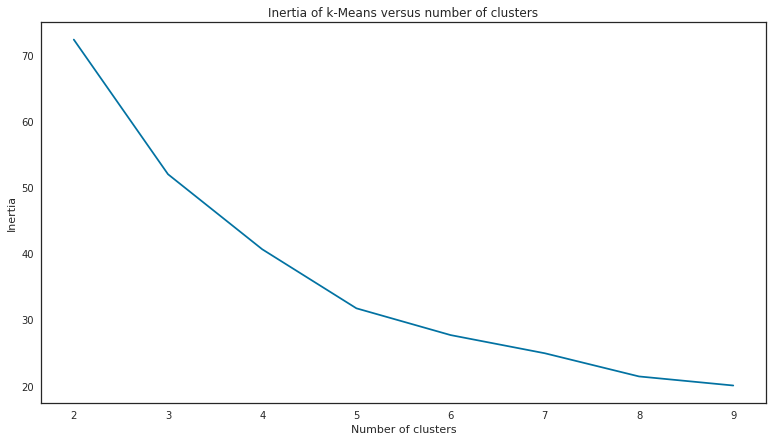

In [169]:
scores1 = [KMeans(n_clusters=i+2, random_state=11).fit(X_pca).inertia_ 
          for i in range(8)]
plt.figure(figsize=(13,7))
sns.lineplot(np.arange(2, 10), scores1)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

From this we can say that number of clusters can be 5

In [170]:
model1 = KMeans(random_state=11, n_clusters=5)
model1.fit(X_pca)

KMeans(n_clusters=5, random_state=11)

In [171]:
cluster_labels = model1.predict(X_pca)

In [172]:
# Making label column
df_cluster['labels'] = cluster_labels

Text(0.5, 0, 'PC1')

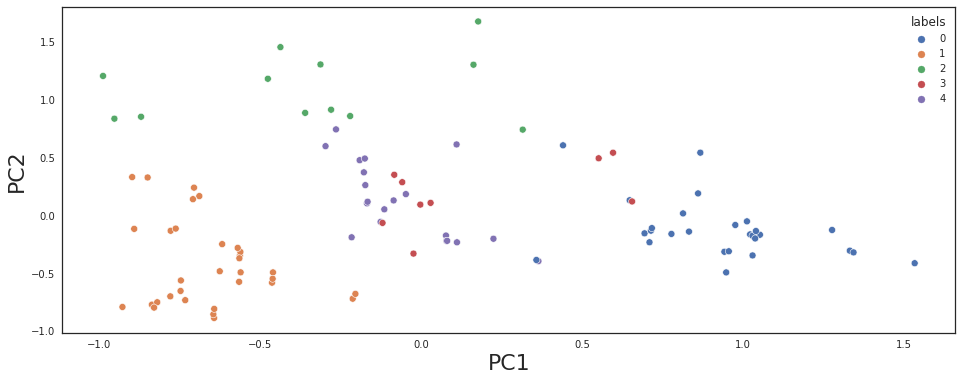

In [173]:
plt.figure(figsize = (16,6))
sns.set_style('white')
sns.scatterplot(y=X_pca[:,1],x=X_pca[:,0],data=df_cluster,hue='labels', palette = 'deep')
plt.ylabel('PC2',fontdict={'size':22})
plt.xlabel('PC1',fontdict={'size':22})

In [174]:
df_0 = df_cluster[df_cluster['labels'] == 0].reset_index()
df_1 = df_cluster[df_cluster['labels'] == 1].reset_index()
df_2 = df_cluster[df_cluster['labels'] == 2].reset_index()
df_3 = df_cluster[df_cluster['labels'] == 3].reset_index()
df_4 = df_cluster[df_cluster['labels'] == 4].reset_index()

In [175]:
list_of_df = [df_0,df_1,df_2,df_3,df_4]

In [176]:
# Most Prominent cuisines in each cluster(Top 5)
for i,df in enumerate(list_of_df):
  print(f'Top Cuisines in Cluster {i} \n', df.drop(['index','Name','Cost','Rating','labels'],axis = 1).sum().sort_values(ascending=False)[:3],'\n')

Top Cuisines in Cluster 0 
 desserts    12
fastfood    10
cafe         6
dtype: int64 

Top Cuisines in Cluster 1 
 northindian    32
chinese        31
biryani        13
dtype: int64 

Top Cuisines in Cluster 2 
 continental    12
italian         9
northindian     8
dtype: int64 

Top Cuisines in Cluster 3 
 asian      6
chinese    6
thai       2
dtype: int64 

Top Cuisines in Cluster 4 
 northindian      20
mediterranean     4
southindian       4
dtype: int64 



Here We can see that cuisines are well differentiated amongst clusters, as compared to unscaled data.

## **Conclusion**

• The most popular cuisines are the cuisines which most of the restaurants are willing to provide. The most popular cuisines in Hyderabad are North Indian, Chinese, Continental, and Hyderabadi.

• The cheapest is the food joint called Mohammedia Shawarma and the costliest restaurant is Collage – Hyatt Hyderabad Gachibowli.

• Sentiment Analysis was done on the reviews and a model was trained in order to identify negative and positive sentiments.

• SVM and XGB both performed well and we can choose any one them.

• SVM and XGB are having 0.921 and 0.92.8 of testing accuracy respectively.

• We got best cluster as 5 in K-Means and Principal Component Analysis(PCA)